Predicting Spam mails using Classification methods

    The main goal of this analysis is to identify whether an email as a spam or not spam. Words that frequently occur in a spam email are used as the feature set in this analysis. We examine some of the techniques and provide a performance analysis of the different techniques.
    This is a data set collected at Hewlett-Packard Labs, that classifies 4601 e-mails as spam or non-spam. In addition to this class label there are 57 variables indicating the frequency of certain words and characters in the e-mail. The spam data set contains a number of variables representing the frequency with which certain words and punctuation appear in an e-mail. 


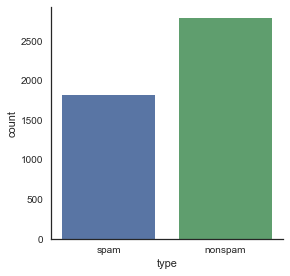

In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)
spamdata = pd.read_csv('C:/Users/varsh/Desktop/PythonData/spamdata.csv')
sns.factorplot('type',data=spamdata, kind='count')

If the words like "free", "credit", or "money" appear in the e-mail, then there is a likelihood it is a spam e-mail. 

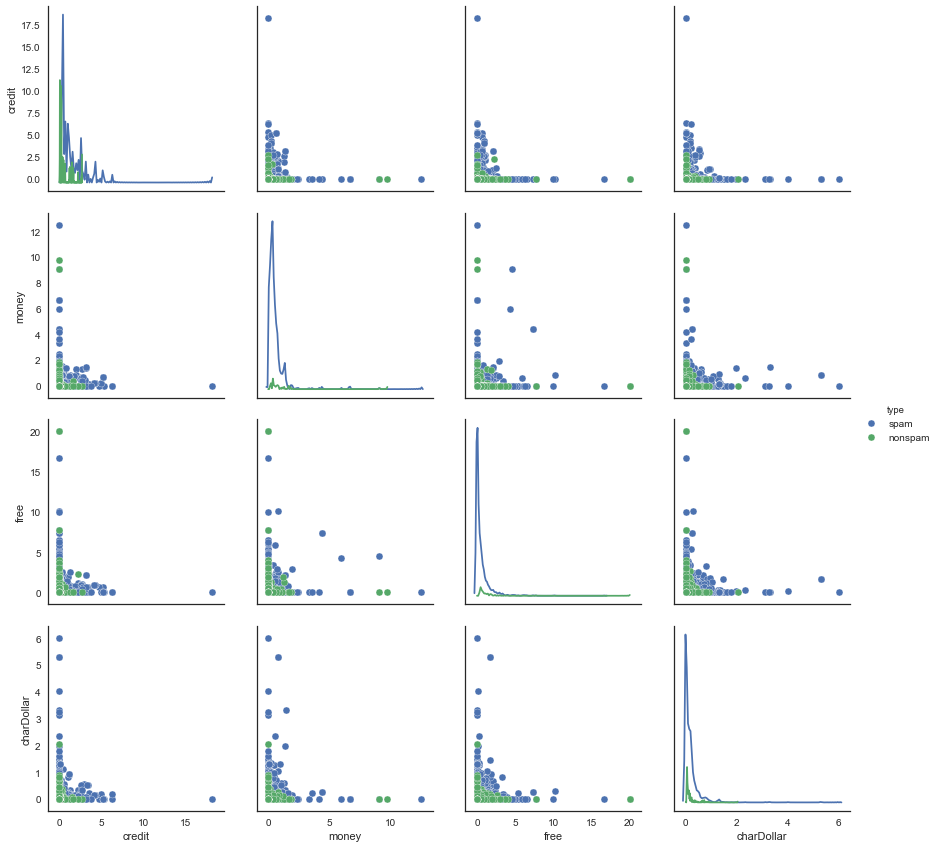

In [47]:
import seaborn as sns;
data = spamdata[['credit','money','free','charDollar','type']]
sns.pairplot(data, hue="type", size=3, diag_kind="kde")

We first split the data into training (80%) and testing data(20%). In this dataset the response variable is qualitative—also
known as a categorical variable. Predicting qualitative responses is called classification. Classification trees are considered
non-linear models. All tree-based techniques produce one or more tree objects that represent a series of splits from the 
root or top of the tree. 

In [14]:
from sklearn.model_selection import train_test_split
label = spamdata.pop('type')
data_train, data_test, label_train, label_test = train_test_split(spamdata, label, test_size = 0.2, random_state = 42)

In [15]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()
logis.fit(data_train, label_train)
logis_score_train = logis.score(data_train, label_train)
print("Training score: ",logis_score_train)
logis_score_test = logis.score(data_test, label_test)
print("Testing score: ",logis_score_test)

Training score:  0.932065217391
Testing score:  0.922909880565


In [17]:
#SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(data_train, label_train)
svm_score_train = svm.score(data_train, label_train)
print("Training score: ",svm_score_train)
svm_score_test = svm.score(data_test, label_test)
print("Testing score: ",svm_score_test)

Training score:  0.948641304348
Testing score:  0.820846905537


In [18]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data_train, label_train)
knn_score_train = knn.score(data_train, label_train)
print("Training score: ",knn_score_train)
knn_score_test = knn.score(data_test, label_test)
print("Testing score: ",knn_score_test)

Training score:  0.872010869565
Testing score:  0.790445168295


In [19]:
#decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

Training score:  0.999456521739
Testing score:  0.914223669924


In [20]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(data_train, label_train)
rfc_score_train = rfc.score(data_train, label_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(data_test, label_test)
print("Testing score: ",rfc_score_test)

Training score:  0.995380434783
Testing score:  0.943539630836


In [21]:
#Model comparison
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'SVM', 'kNN', 'Decision Tree', 'Random Forest'],
        'Training_Score' : [logis_score_train, svm_score_train, knn_score_train, dt_score_train, rfc_score_train],
        'Testing_Score'  : [logis_score_test, svm_score_test, knn_score_test, dt_score_test, rfc_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Testing_Score,Training_Score
4,Random Forest,0.943540,0.995380
0,Logistic Regression,0.922910,0.932065
3,Decision Tree,0.914224,0.999457
1,SVM,0.820847,0.948641
2,kNN,0.790445,0.872011
